## HW_L3
ENGN 2912V - Deep Learning

Seokkee Min

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras


# Problem 1

In [2]:
# create data batch
def batch_lin(a):
    x = np.linspace(-np.pi, np.pi, a, dtype=np.float64)
    return x

def batch_rand(a):
    x = np.random.uniform(-np.pi, np.pi, a)
    return x

In [3]:
# define analytical function
def fun_x(i, count):
    if i<0:
        j = 0
        y = 5
        for j in range(count):
            y += np.sin((j+1)*i)
    if i >= 0:
        y = np.cos(10*i)
    return y

In [4]:
# select equi-spaced or random uniform sampling
def data_create(batch, distr, count):
    if distr == "lin":
        x = batch_lin(batch)
    if distr == "uni_rand":
        x = batch_rand(batch)
        x = np.sort(x)
    x = x.reshape((-1,1))
    y = np.array([fun_x(i, count) for i in x])
    y = y.reshape((-1,1))
    return x,y

In [5]:
def ML(x, y, node, act, ep, distr, batch):
    model = keras.Sequential()
    model.add(keras.layers.Dense(node, input_dim=x.shape[1],\
                                kernel_initializer='he_normal', \
                                activation=act))
    model.add(keras.layers.Dense(node, kernel_initializer='he_normal', \
                                activation=act))
    model.add(keras.layers.Dense(1, kernel_initializer='he_normal',activation='linear'))
    model.compile(optimizer='adam',
                 loss='mse',
                 metrics=['mse'])

    model.fit(x,y, epochs = ep, batch_size=np.size(x), verbose=0)
    y_pred = model.predict(x, batch_size=np.size(x), verbose=0)
    
    # plt.plot(x,y,".", label="Actual")
    # plt.plot(x,y_pred, "-", label="Predicted")
    plt.plot(x,y,".")
    plt.plot(x,y_pred, "-")   
    
    # plt.legend();
    ti = "{} activation - {} distribution - {} data points".format(act, distr, batch)
    plt.title(ti)
    return model

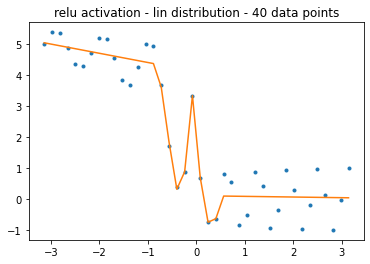

In [6]:
# ReLU - 40 data points - linear
batch = 40
distr = "lin"
count = 6

act = "relu"
epoch = 5000
x,y = data_create(batch, distr, count)

model = ML(x,y,20,act,epoch, distr, batch)
# del x, y

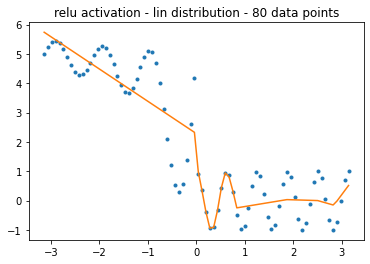

In [7]:
del x, y, model

# ReLU - 80 data points - linear
batch = 80
distr = "lin"
count = 6

act = "relu"
epoch = 5000
x,y = data_create(batch, distr, count)

model = ML(x,y,20,act,epoch, distr, batch)

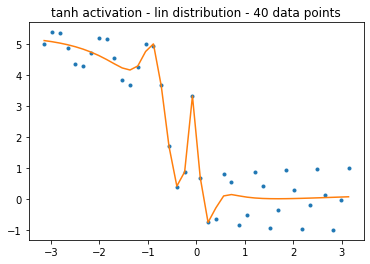

In [8]:
del x, y, model

# tanh - 40 data points - linear
batch = 40
distr = "lin"
count = 6

act = "tanh"
epoch = 5000
x,y = data_create(batch, distr, count)

model = ML(x,y,20,act,epoch, distr, batch)

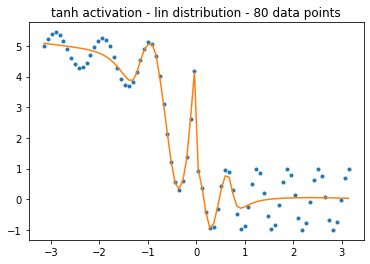

In [9]:
del x, y, model

# tanh - 80 data points - linear
batch = 80
distr = "lin"
count = 6

act = "tanh"
epoch = 5000
x,y = data_create(batch, distr, count)

model = ML(x,y,20,act,epoch, distr, batch)

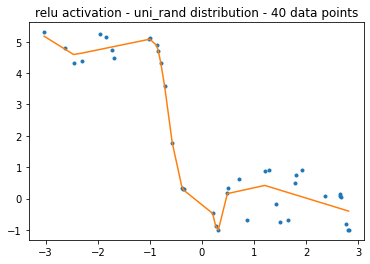

In [10]:
del x, y, model

# ReLU - 40 data points - uni_rand
batch = 40
distr = "uni_rand"
count = 6

act = "relu"
epoch = 5000
x,y = data_create(batch, distr, count)

model = ML(x,y,20,act,epoch, distr, batch)

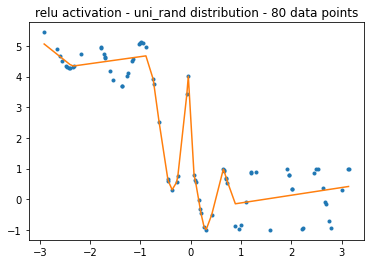

In [11]:
del x, y, model

# ReLU - 80 data points - uni_rand
batch = 80
distr = "uni_rand"
count = 6

act = "relu"
epoch = 5000
x,y = data_create(batch, distr, count)

model = ML(x,y,20,act,epoch, distr, batch)

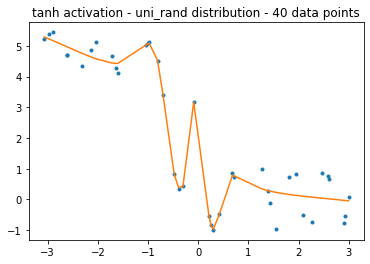

In [12]:
del x, y, model

# tanh - 40 data points - uni_rand
batch = 40
distr = "uni_rand"
count = 6

act = "tanh"
epoch = 5000
x,y = data_create(batch, distr, count)

model = ML(x,y,20,act,epoch, distr, batch)

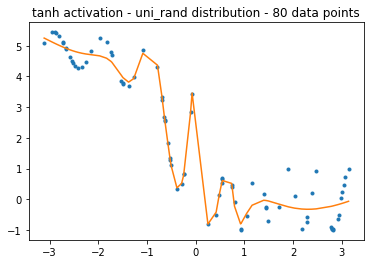

In [13]:
del x, y, model

# tanh - 80 data points - uni_rand
batch = 80
distr = "uni_rand"
count = 6

act = "tanh"
epoch = 5000
x,y = data_create(batch, distr, count)

model = ML(x,y,20,act,epoch, distr, batch)

# Problem 2 - Laplacian Operator

In [14]:
# Inputs
x = tf.Variable(1.)    # Change as needed
y = tf.Variable(1.)    # Change as needed
z = tf.Variable(1.)    # Change as needed

In [15]:
# Tape returns None when functions aren't written explicitly inside tape
#f1 = (x*y)**(1/2)+z
#f2 = (3*x**2 + y**2 + 5*z**2)**(1/2)
#f3 = x**7 * y**5
#f4 = (x**2 + y**2 + z**2)**(-1/2)

Probelm 2.a: 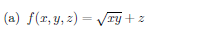

In [16]:
with tf.GradientTape(persistent=True) as f:
    f.watch([x,y,z])
    with tf.GradientTape(persistent=True) as g:
        g.watch([[x,y,z]])
        
        # change a - function as needed
        a = (x*y)**(1/2)+z
        #
        
    dx = g.gradient(a, x)
    dy = g.gradient(a, y)
    dz = g.gradient(a, z)
if dx == None:
    dx = tf.constant(0.)  
if dy == None:
    dy = tf.constant(0.)  
if dz == None:
    dz = tf.constant(0.)  
dx2 = f.gradient(dx, x)
dy2 = f.gradient(dy, x)
dz2 = f.gradient(dz, x)
if dx2 == None:
    dx2 = tf.constant(0.)  
if dy2 == None:
    dy2 = tf.constant(0.)  
if dz2 == None:
    dz2 = tf.constant(0.) 
print(dx2)
print(dy2)
print(dz2)

L1 = tf.linalg.diag([dx2, dy2, dz2])
print(L1)

tf.Tensor(-0.25, shape=(), dtype=float32)
tf.Tensor(0.25, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(
[[-0.25  0.    0.  ]
 [ 0.    0.25  0.  ]
 [ 0.    0.    0.  ]], shape=(3, 3), dtype=float32)


Problem 2.b: 

In [17]:
with tf.GradientTape(persistent=True) as f:
    f.watch([x,y,z])
    with tf.GradientTape(persistent=True) as g:
        g.watch([[x,y,z]])
        
        # change a - function as needed
        a = (3*x**2 + y**2 + 5*z**2)**(1/2)
        #
        
    dx = g.gradient(a, x)
    dy = g.gradient(a, y)
    dz = g.gradient(a, z)
if dx == None:
    dx = tf.constant(0.)  
if dy == None:
    dy = tf.constant(0.)  
if dz == None:
    dz = tf.constant(0.)  
dx2 = f.gradient(dx, x)
dy2 = f.gradient(dy, x)
dz2 = f.gradient(dz, x)
if dx2 == None:
    dx2 = tf.constant(0.)  
if dy2 == None:
    dy2 = tf.constant(0.)  
if dz2 == None:
    dz2 = tf.constant(0.) 
print(dx2)
print(dy2)
print(dz2)

L1 = tf.linalg.diag([dx2, dy2, dz2])
print(L1)

tf.Tensor(0.6666666, shape=(), dtype=float32)
tf.Tensor(-0.11111111, shape=(), dtype=float32)
tf.Tensor(-0.5555556, shape=(), dtype=float32)
tf.Tensor(
[[ 0.6666666   0.          0.        ]
 [ 0.         -0.11111111  0.        ]
 [ 0.          0.         -0.5555556 ]], shape=(3, 3), dtype=float32)


Problem 2.c: 

In [18]:
with tf.GradientTape(persistent=True) as f:
    f.watch([x,y,z])
    with tf.GradientTape(persistent=True) as g:
        g.watch([[x,y,z]])
        
        # change a - function as needed
        a = x**7 * y**5
        #
        
    dx = g.gradient(a, x)
    dy = g.gradient(a, y)
    dz = g.gradient(a, z)
if dx == None:
    dx = tf.constant(0.)  
if dy == None:
    dy = tf.constant(0.)  
if dz == None:
    dz = tf.constant(0.)  
dx2 = f.gradient(dx, x)
dy2 = f.gradient(dy, x)
dz2 = f.gradient(dz, x)
if dx2 == None:
    dx2 = tf.constant(0.)  
if dy2 == None:
    dy2 = tf.constant(0.)  
if dz2 == None:
    dz2 = tf.constant(0.) 
print(dx2)
print(dy2)
print(dz2)

L1 = tf.linalg.diag([dx2, dy2, dz2])
print(L1)

tf.Tensor(42.0, shape=(), dtype=float32)
tf.Tensor(35.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(
[[42.  0.  0.]
 [ 0. 35.  0.]
 [ 0.  0.  0.]], shape=(3, 3), dtype=float32)


Problem 2.d: 

In [19]:
with tf.GradientTape(persistent=True) as f:
    f.watch([x,y,z])
    with tf.GradientTape(persistent=True) as g:
        g.watch([[x,y,z]])
        
        # change a - function as needed
        a = (x**2 + y**2 + z**2)**(-1/2)
        #
        
    dx = g.gradient(a, x)
    dy = g.gradient(a, y)
    dz = g.gradient(a, z)
if dx == None:
    dx = tf.constant(0.)  
if dy == None:
    dy = tf.constant(0.)  
if dz == None:
    dz = tf.constant(0.)  
dx2 = f.gradient(dx, x)
dy2 = f.gradient(dy, x)
dz2 = f.gradient(dz, x)
if dx2 == None:
    dx2 = tf.constant(0.)  
if dy2 == None:
    dy2 = tf.constant(0.)  
if dz2 == None:
    dz2 = tf.constant(0.) 
print(dx2)
print(dy2)
print(dz2)

L1 = tf.linalg.diag([dx2, dy2, dz2])
print(L1)

tf.Tensor(-1.4901161e-08, shape=(), dtype=float32)
tf.Tensor(0.19245008, shape=(), dtype=float32)
tf.Tensor(0.19245008, shape=(), dtype=float32)
tf.Tensor(
[[-1.4901161e-08  0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  1.9245008e-01  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  1.9245008e-01]], shape=(3, 3), dtype=float32)


# Problem 3 - Shallow Network

In [20]:
def SL(x,y,width,ep):
    model = keras.Sequential()
    model.add(keras.layers.Dense(width, input_dim=x.shape[1],\
                                kernel_initializer='he_normal', \
                                activation="relu"))
    model.add(keras.layers.Dense(1, kernel_initializer='he_normal',activation='linear'))
    model.compile(optimizer='adam',
                 loss='mse',
                 metrics=['mse'])

    model.fit(x,y, epochs = ep, batch_size=np.size(x), verbose=0)
    y_pred = model.predict(x, batch_size=np.size(x), verbose=0)
    
    plt.plot(x,y,".", label="Actual")
    plt.plot(x,y_pred, "-", label="Predicted")
    # plt.legend();
    
    return model

In [26]:
def L2E(model, x, y):
    y_pred = model.predict(x, batch_size=np.size(x), verbose=0)
    f2norm = tf.norm(y, ord=2)
    n_f_norm = tf.norm(y_pred - y, ord=2)
    error = n_f_norm/f2norm
    # print("L2 norm error is {}".format(error))
    return error
    

In [22]:
def err_dev(L):
    mean = np.mean(L, dtype=np.float64)
    dev = np.std(L, dtype=np.float64)
    return mean, dev

In [23]:
# Create training data
width = [10, 30, 100, 300, 1000]
batch = 200
distr = "lin"
count = 4
ep = 5000

x_train, y_train = data_create(batch, distr, count)
x_comp, y_comp = data_create(500, distr, 4)

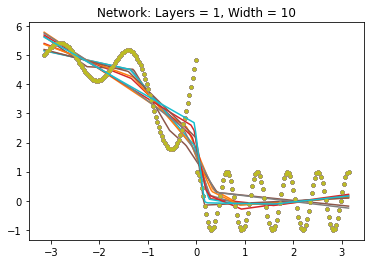

Width = 10. L2 error mean, st.dev. is 0.24689545931553197, 0.010267094178453302


In [28]:
D = np.zeros(10)

for i in range(10):
    model1 = SL(x_train, y_train, 10, ep)
    L1 = L2E(model1, x_comp, y_comp)
    D[i] = L1
plt.title("Network: Layers = 1, Width = 10")
plt.show()    
m1, d1 = err_dev(D)
print("Width = 10. L2 error mean, st.dev. is {}, {}".format(m1, d1))

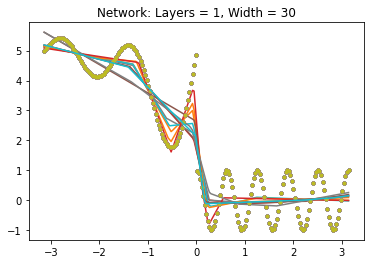

Width = 30. L2 error mean, st.dev. is 0.22112333747445292, 0.02100951386606437


In [29]:
D = np.zeros(10)

for i in range(10):
    model2 = SL(x_train, y_train, 30, ep)
    L2 = L2E(model2, x_comp, y_comp)
    D[i] = L2
plt.title("Network: Layers = 1, Width = 30")
plt.show()    
m2, d2 = err_dev(D)
print("Width = 30. L2 error mean, st.dev. is {}, {}".format(m2, d2))

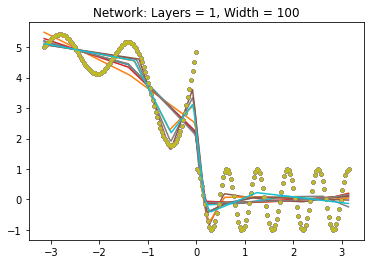

Width = 100. L2 error mean, st.dev. is 0.2164370136176726, 0.01914757561723975


In [30]:
D = np.zeros(10)

for i in range(10):
    model3 = SL(x_train, y_train, 100, ep)
    L3 = L2E(model3, x_comp, y_comp)
    D[i] = L3
plt.title("Network: Layers = 1, Width = 100")
plt.show()    
m3, d3 = err_dev(D)
print("Width = 100. L2 error mean, st.dev. is {}, {}".format(m3, d3))

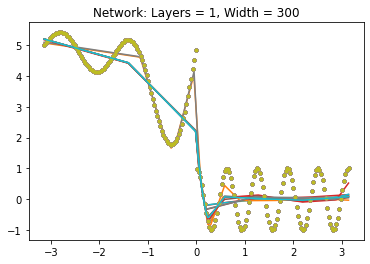

Width = 300. L2 error mean, st.dev. is 0.21777592099064766, 0.020784422389242014


In [31]:
D = np.zeros(10)

for i in range(10):
    model4 = SL(x_train, y_train, 300, ep)
    L4 = L2E(model4, x_comp, y_comp)
    D[i] = L4
plt.title("Network: Layers = 1, Width = 300")
plt.show()    
m4, d4 = err_dev(D)
print("Width = 300. L2 error mean, st.dev. is {}, {}".format(m4, d4))

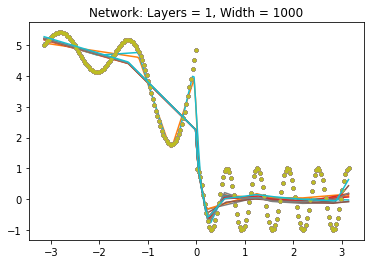

Width = 1000. L2 error mean, st.dev. is 0.21639367291249273, 0.021458610225462083


In [32]:
D = np.zeros(10)

for i in range(10):
    model5 = SL(x_train, y_train, 1000, ep)
    L5 = L2E(model5, x_comp, y_comp)
    D[i] = L5
plt.title("Network: Layers = 1, Width = 1000")
plt.show()    
m5, d5 = err_dev(D)
print("Width = 1000. L2 error mean, st.dev. is {}, {}".format(m5, d5))

Text(0.5, 1.0, 'Shallow Network Error')

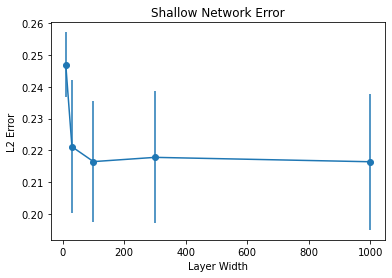

In [33]:
L2_mean = [m1, m2, m3, m4, m5]
L2_dev = [d1, d2, d3, d4, d5]
plt.errorbar(width, L2_mean, L2_dev, fmt='-o')
# plt.plot(width, L2_error, 'b-o')
plt.xlabel("Layer Width")
plt.ylabel("L2 Error")
plt.title("Shallow Network Error")

As the width of the single layer increases, the L2 norm error decreases overall when the number of epochs is constant (5000) for each system for widths 10, 30, and 100. Then the L2 error seems to level out for network widths 100, 300, and 1000, with a much higher standard deviation in the L2 error.

# Problem 3A - Deep Network (2 layers)

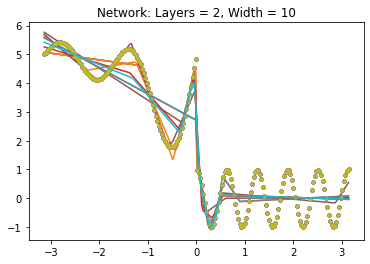

For width 10: L2 error mean, st.dev. is 0.1909304163292132, 0.026762644762180227


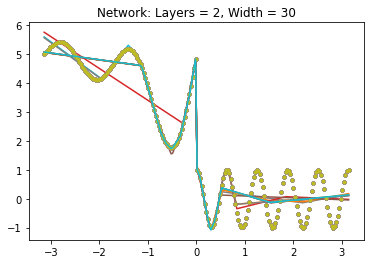

For width 30: L2 error mean, st.dev. is 0.16663712973253555, 0.015497329958992426


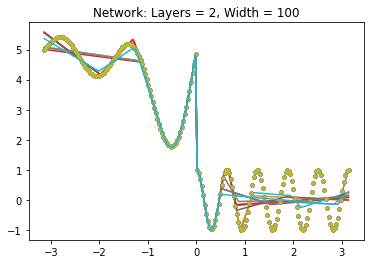

For width 100: L2 error mean, st.dev. is 0.15088248569860452, 0.008386276268865572


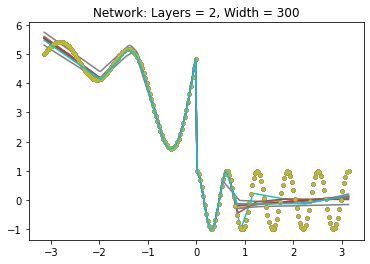

For width 300: L2 error mean, st.dev. is 0.1453778584821636, 0.004735333523682641


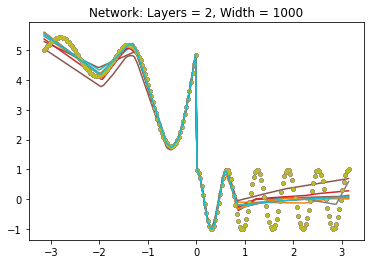

For width 1000: L2 error mean, st.dev. is 0.14993852349422684, 0.01287500772945557


In [34]:
width = [10, 30, 100, 300, 1000];
LA = np.zeros([5, 10])
ma = np.zeros(np.size(width))
da = np.zeros(np.size(width))
for i in range(5):
    
    for j in range(10):
        modela = ML(x_train, y_train, width[i], "relu", ep, "lin", 200)
        plt.title("Network: Layers = 2, Width = {}".format(width[i]))
        LA[i, j] = L2E(modela, x_comp, y_comp)
        
    plt.show()
    ma[i], da[i] = err_dev(LA[i,:])    
    print("For width {}: L2 error mean, st.dev. is {}, {}".format(width[i], ma[i], da[i]))


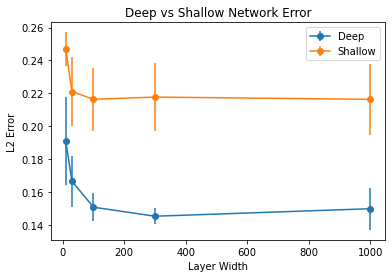

In [35]:
plt.errorbar(width, ma, da, fmt='-o', label = "Deep")
plt.xlabel("Layer Width")
plt.ylabel("L2 Error")
plt.title("Deep vs Shallow Network Error")
plt.errorbar(width, L2_mean, L2_dev, fmt='-o', label = "Shallow")
plt.legend(loc="upper right")
plt.show()

Going from a shallow network to a deep network, by an increase of just one layer, significantly decreased the L2-error overall. This is in agreement with Mhasker (1996) that from an approximation point of view, that deep networks outperform shallow ones of comparable size.

Similar to the shallow network, an increase in width generally decreases the L2 error. 

## Problem 3B - 20 data points

In [36]:
# Create training data
batchb = 20
distr = "lin"
count = 4

x_trainb, y_trainb = data_create(batchb, distr, count)

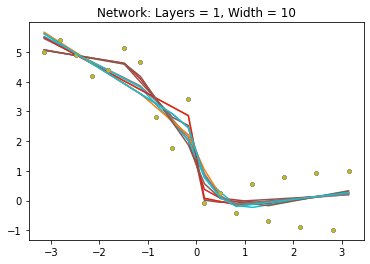

For width 10: L2 error mean, st.dev. is 0.25485234898684794, 0.0072612843118715535


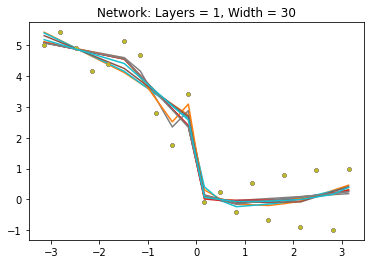

For width 30: L2 error mean, st.dev. is 0.24294091145546806, 0.010522958212279592


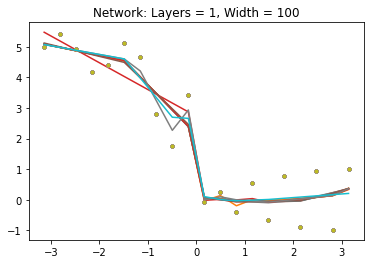

For width 100: L2 error mean, st.dev. is 0.24145414439190724, 0.008739644672836095


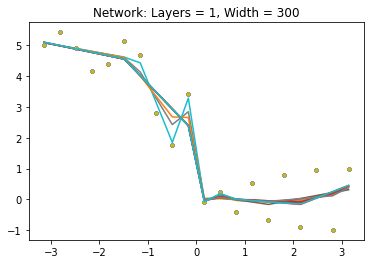

For width 300: L2 error mean, st.dev. is 0.23601031111434553, 0.012491870351239494


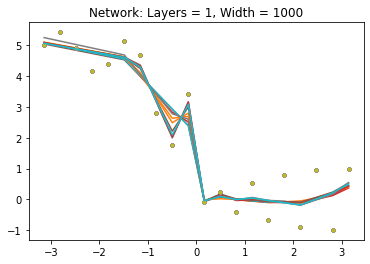

For width 1000: L2 error mean, st.dev. is 0.2212599568128928, 0.014472153569010793


In [37]:
LB = np.zeros([5, 10])
mb = np.zeros(np.size(width))
db = np.zeros(np.size(width))
for i in range(5):
    
    for j in range(10):
        modelb = SL(x_trainb, y_trainb, width[i], ep)
        plt.title("Network: Layers = 1, Width = {}".format(width[i]))
        LB[i, j] = L2E(modelb, x_comp, y_comp)
        
    plt.show()
    mb[i], db[i] = err_dev(LB[i,:])    
    print("For width {}: L2 error mean, st.dev. is {}, {}".format(width[i], mb[i], db[i]))

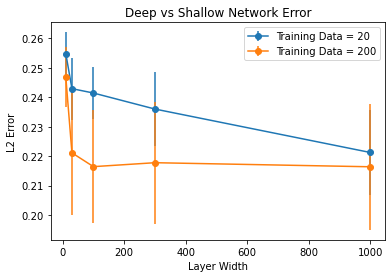

In [38]:
plt.errorbar(width, mb, db, fmt='-o', label = "Training Data = 20")
plt.xlabel("Layer Width")
plt.ylabel("L2 Error")
plt.title("Deep vs Shallow Network Error")
plt.errorbar(width, L2_mean, L2_dev, fmt='-o', label = "Training Data = 200")
plt.legend(loc="upper right")
plt.show()

The estimation error is the error between the "minimizer" and the "best model," which exists because the algorithm works with a finite training set that only partially reflects the true distribution of the data. It reflects the inability of the learning model to find the best model. This is in contrast to approximation error, which is the error between the "best model" and the "truth." 

The sum of estimation and approximation errors together combine to form the "generalization error," which is reflected in the plot above where L2 error of the model is less for the model trained with 200 data points, than the model trained with only 20 data points, for networks of comparable sizes. This is because the estimation error is larger for the model trained with only 20 data points, than the one trained with 200 data points.